In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
excel_file = pd.read_excel("processed.xlsx", None)
excel_file.keys()

dict_keys(['Supplementary Table 1', 'Supplementary Table 2', 'Supplementary Table 3', 'Supplementary Table 4', 'Supplementary Table 5', 'Supplementary Table 6', 'Supplementary Table 7', 'Supplementary Table 8', 'Supplementary Table 9', 'Supplementary Table 10', 'Supplementary Table 11', 'Supplementary Table 12', 'Supplementary Table 13', 'Supplementary Table 14', 'Supplementary Table 15', 'Supplementary Table 16', 'Supplementary Table 17', 'Supplementary Table 18', 'Supplementary Table 19', 'Supplementary Table 20', 'Supplementary Table 21', 'Supplementary Table 22'])

In [3]:
tb_5 = excel_file["Supplementary Table 5"]
tb_6 = excel_file["Supplementary Table 6"]

In [4]:
tb_5

,gene,gene_gencodeV33,gene_id,chromosome,pLI,LOEUF,mut.ptv,mut.misb,mut.misa,dn.ptv,...,in.t.ptv,in.u.ptv,in.t.misb,in.u.misb,in.t.misa,in.u.misa,in.t.mis.all,in.u.mis.all,in.t.syn,in.u.syn
0,MED13,MED13,ENSG00000108510,17,1.000000e+00,0.030,0.000008,2.750288e-06,0.000003,3,...,0,0,3,3,8,2,198,169,90,78
1,NIPBL,NIPBL,ENSG00000164190,5,1.000000e+00,0.032,0.000016,1.539093e-05,0.000016,0,...,0,0,9,5,20,20,130,98,121,126
2,SMC3,SMC3,ENSG00000108055,10,1.000000e+00,0.037,0.000008,1.022912e-05,0.000013,0,...,0,0,2,6,6,7,12,20,33,28
3,CNOT1,CNOT1,ENSG00000125107,16,1.000000e+00,0.038,0.000011,1.197721e-05,0.000029,0,...,1,1,9,5,38,27,91,74,63,81
4,RLF,RLF,ENSG00000117000,1,1.000000e+00,0.040,0.000007,0.000000e+00,0.000018,0,...,0,0,0,0,14,22,111,127,60,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,TRIM48,TRIM48,ENSG00000150244,11,1.099500e-27,1.985,0.000001,0.000000e+00,0.000000,0,...,0,0,0,0,0,0,5,3,0,1
18124,PSG1,PSG1,ENSG00000231924,19,1.624200e-29,1.986,0.000001,0.000000e+00,0.000000,0,...,1,1,0,0,0,0,14,12,8,7
18125,NBPF10,NBPF10,ENSG00000163386,1,4.100800e-85,1.988,0.000004,0.000000e+00,0.000000,0,...,0,0,0,0,0,0,13,7,0,0
18126,LZTR1,LZTR1,ENSG00000099949,22,1.021100e-92,1.994,0.000004,4.213233e-07,0.000010,0,...,23,11,1,0,16,15,78,94,137,117


In [5]:
tb_6

,gene,gene_gencodeV33,gene_id,chromosome,pLI,LOEUF,mut.ptv,mut.misb,mut.misa,dn.ptv,...,in.t.ptv,in.u.ptv,in.t.misb,in.u.misb,in.t.misa,in.u.misa,in.t.mis.all,in.u.mis.all,in.t.syn,in.u.syn
0,MED13,MED13,ENSG00000108510,17,1.000000e+00,0.030,0.000009,3.723593e-06,0.000003,4,...,0,0,3,1,3,2,168,151,111,115
1,NIPBL,NIPBL,ENSG00000164190,5,1.000000e+00,0.032,0.000018,2.083765e-05,0.000019,0,...,0,0,10,10,17,17,109,128,117,114
2,SMC3,SMC3,ENSG00000108055,10,1.000000e+00,0.037,0.000009,1.384912e-05,0.000015,0,...,1,0,2,3,5,14,19,24,26,36
3,CNOT1,CNOT1,ENSG00000125107,16,1.000000e+00,0.038,0.000013,1.621584e-05,0.000035,0,...,0,0,4,8,25,36,67,93,76,78
4,RLF,RLF,ENSG00000117000,1,1.000000e+00,0.040,0.000008,0.000000e+00,0.000021,1,...,0,0,0,0,27,19,159,145,75,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,TRIM48,TRIM48,ENSG00000150244,11,1.099500e-27,1.985,0.000001,0.000000e+00,0.000000,0,...,1,1,0,0,0,0,0,4,0,2
18124,PSG1,PSG1,ENSG00000231924,19,1.624200e-29,1.986,0.000002,0.000000e+00,0.000000,0,...,0,0,0,0,0,0,4,4,3,0
18125,NBPF10,NBPF10,ENSG00000163386,1,4.100800e-85,1.988,0.000005,0.000000e+00,0.000000,0,...,0,0,0,0,0,0,2,2,3,1
18126,LZTR1,LZTR1,ENSG00000099949,22,1.021100e-92,1.994,0.000004,5.704262e-07,0.000012,1,...,18,19,0,0,24,23,105,85,140,148


In [6]:
def filter_pcdh(table):
    new_table = table[table['gene'].str.contains("PCDH")]
    clustered = new_table[new_table['gene'].str.contains('PCDHA|PCDHAC|PCDHB|PCDHGA|PCDHGB|PCDHGC', regex=True)]
    column_fresh = clustered.sort_values(by='gene').reset_index(drop=True)[["gene", "mut.ptv", "mut.misb", "mut.misa", "dn.ptv", "dn.misb", "dn.misa", "dn.mis"]]
    return column_fresh

In [18]:
pcdh_5 = filter_pcdh(tb_5)
pcdh_5

,gene,mut.ptv,mut.misb,mut.misa,dn.ptv,dn.misb,dn.misa,dn.mis
0,PCDHA1,2.386205e-06,0.000000e+00,5.083989e-06,0,0,0,0
1,PCDHA10,2.203797e-06,0.000000e+00,0.000000e+00,0,0,0,0
2,PCDHA11,3.082168e-06,0.000000e+00,3.961496e-06,0,0,0,1
3,PCDHA12,2.190565e-06,0.000000e+00,0.000000e+00,0,0,0,0
4,PCDHA13,2.505465e-06,0.000000e+00,0.000000e+00,1,0,0,0
5,PCDHA2,2.507810e-06,0.000000e+00,0.000000e+00,0,0,0,0
6,PCDHA3,2.446840e-06,0.000000e+00,0.000000e+00,0,0,0,0
7,PCDHA4,2.305470e-06,0.000000e+00,0.000000e+00,0,0,0,0
8,PCDHA5,2.365100e-06,0.000000e+00,8.327735e-06,0,0,0,2
9,PCDHA6,2.401950e-06,1.216344e-07,1.778071e-05,0,0,0,0


In [8]:
pcdh_6 = filter_pcdh(tb_6)
pcdh_6

,gene,mut.ptv,mut.misb,mut.misa,dn.ptv,dn.misb,dn.misa,dn.mis
0,PCDHA1,0.000003,0.000000e+00,6.080890e-06,0,0,0,0
1,PCDHA10,0.000002,0.000000e+00,0.000000e+00,0,0,0,0
2,PCDHA11,0.000003,0.000000e+00,4.738292e-06,0,0,0,0
3,PCDHA12,0.000002,0.000000e+00,0.000000e+00,0,0,0,0
4,PCDHA13,0.000003,0.000000e+00,0.000000e+00,0,0,0,0
5,PCDHA2,0.000003,0.000000e+00,0.000000e+00,0,0,0,0
6,PCDHA3,0.000003,0.000000e+00,0.000000e+00,0,0,0,0
7,PCDHA4,0.000003,0.000000e+00,0.000000e+00,0,0,0,0
8,PCDHA5,0.000003,0.000000e+00,9.960691e-06,0,0,0,0
9,PCDHA6,0.000003,1.646798e-07,2.126727e-05,0,0,0,0


In [19]:
pcdh_5.loc[:,"mut_ptv_scaled"] = pcdh_5.loc[:,"mut.ptv"] * 1e6
pcdh_5.loc[:,"dn_ptv_scaled"] = pcdh_5.loc[:,"dn.ptv"] * 1e6
pcdh_5

,gene,mut.ptv,mut.misb,mut.misa,dn.ptv,dn.misb,dn.misa,dn.mis,mut_ptv_scaled,dn_ptv_scaled
0,PCDHA1,2.386205e-06,0.000000e+00,5.083989e-06,0,0,0,0,2.386205,0.0
1,PCDHA10,2.203797e-06,0.000000e+00,0.000000e+00,0,0,0,0,2.203797,0.0
2,PCDHA11,3.082168e-06,0.000000e+00,3.961496e-06,0,0,0,1,3.082168,0.0
3,PCDHA12,2.190565e-06,0.000000e+00,0.000000e+00,0,0,0,0,2.190565,0.0
4,PCDHA13,2.505465e-06,0.000000e+00,0.000000e+00,1,0,0,0,2.505465,1000000.0
5,PCDHA2,2.507810e-06,0.000000e+00,0.000000e+00,0,0,0,0,2.507810,0.0
6,PCDHA3,2.446840e-06,0.000000e+00,0.000000e+00,0,0,0,0,2.446840,0.0
7,PCDHA4,2.305470e-06,0.000000e+00,0.000000e+00,0,0,0,0,2.305470,0.0
8,PCDHA5,2.365100e-06,0.000000e+00,8.327735e-06,0,0,0,2,2.365100,0.0
9,PCDHA6,2.401950e-06,1.216344e-07,1.778071e-05,0,0,0,0,2.401950,0.0


In [20]:
# Run Poisson regression
model = smf.poisson(formula="dn_ptv_scaled ~ mut_ptv_scaled", data=pcdh_5)
results = model.fit()

# Print the summary of the model
print(results.summary())

Optimization terminated successfully.
         Current function value: 197300.574881
         Iterations 4
                          Poisson Regression Results                          
Dep. Variable:          dn_ptv_scaled   No. Observations:                   52
Model:                        Poisson   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:               1.938e-05
Time:                        10:14:19   Log-Likelihood:            -1.0260e+07
converged:                       True   LL-Null:                   -1.0260e+07
Covariance Type:            nonrobust   LLR p-value:                 1.757e-88
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2126      0.002   5690.056      0.000      11.209      11.216
mut_ptv_scal


Yes, the result from your Poisson Regression is statistically significant. Here's how you can interpret the key components of the output:

Coefficient (coef) of mut_ptv_scaled: The value 0.0176 is the estimated change in the log of the expected count of dn_ptv_scaled for a one-unit increase in mut_ptv_scaled.

Standard Error (std err): This represents the standard error of the coefficient estimate. A smaller standard error suggests a more precise estimate.

z-value: The z-value is used to test the null hypothesis that the coefficient is equal to zero (no effect). A large absolute value of the z-score indicates that it is unlikely to observe such a data if the null hypothesis were true.

P-value (P>|z|): This is the p-value associated with the z-test of the coefficient. A p-value is a measure of the probability that an observed difference could have occurred just by random chance. In your output, the p-value for mut_ptv_scaled is extremely small (1.757e-88), which is far below any conventional significance level (e.g., 0.05, 0.01, etc.).

Confidence Interval ([0.025 0.975]): This gives you the 95% confidence interval for the coefficient estimate. It indicates that you can be 95% confident that the true value of the coefficient lies within this range.

Given the very small p-value, you can reject the null hypothesis that there is no association between mut_ptv_scaled and dn_ptv_scaled. This means that the evidence suggests a statistically significant association between these two variables in your dataset.

Remember, statistical significance does not necessarily imply practical significance. It's important to consider the effect size (the coefficient value) and the context of your data to determine if the finding is meaningful in a real-world context.

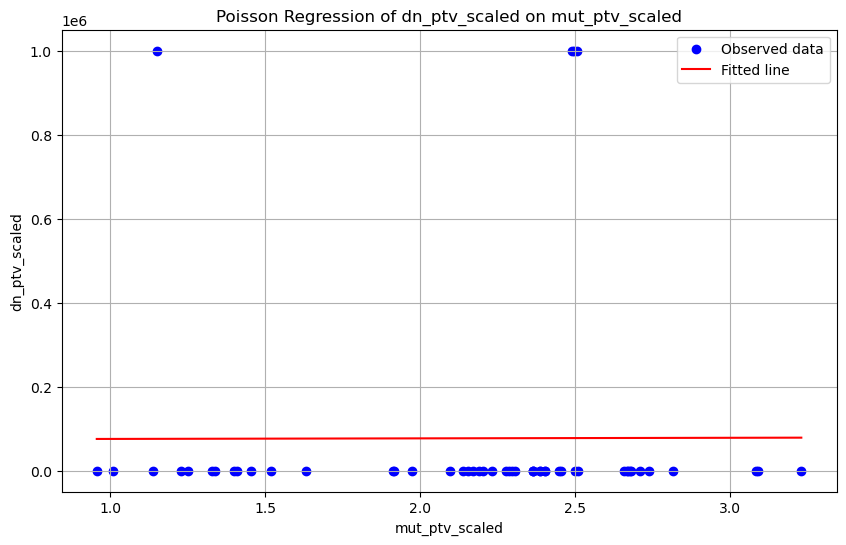

In [24]:
x = np.linspace(pcdh_5['mut_ptv_scaled'].min(), pcdh_5['mut_ptv_scaled'].max(), 100)

# Predict dn_ptv_scaled using the model
predicted_dn_ptv_scaled = results.predict(pd.DataFrame({'mut_ptv_scaled': x}))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pcdh_5['mut_ptv_scaled'], pcdh_5['dn_ptv_scaled'], color='blue', label='Observed data')
plt.plot(x, predicted_dn_ptv_scaled, color='red', label='Fitted line')
plt.xlabel('mut_ptv_scaled')
plt.ylabel('dn_ptv_scaled')
plt.title('Poisson Regression of dn_ptv_scaled on mut_ptv_scaled')
plt.legend()
plt.grid(True)
plt.show()